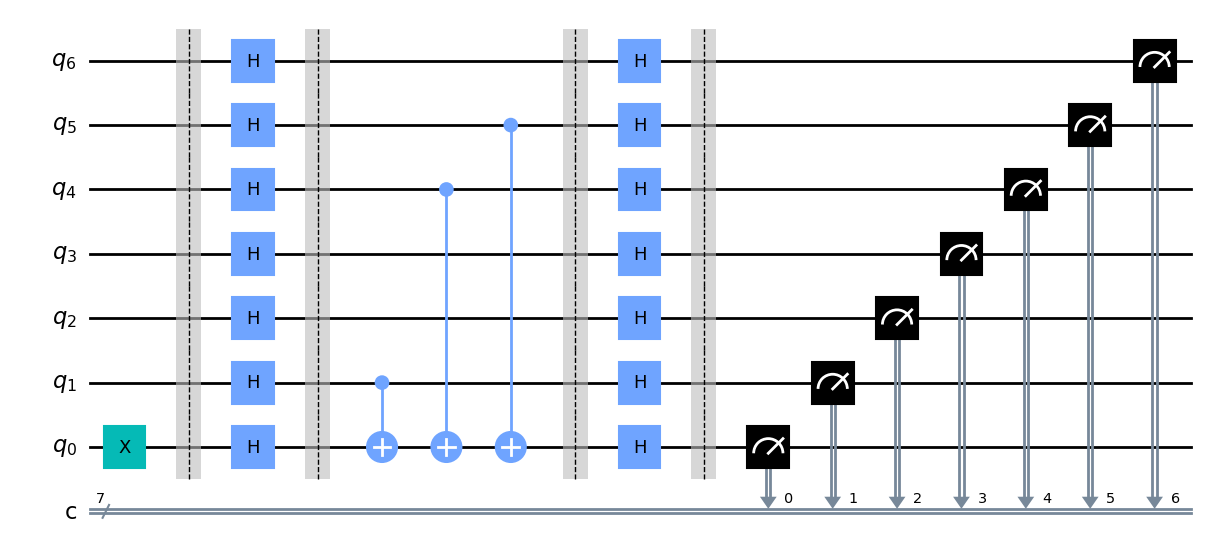

{'0110011': 100}


In [2]:
#Understanding the Phase Kickback

#Importing dependencies
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute

q = QuantumRegister(7,"q")
c = ClassicalRegister(7,"c")

qc = QuantumCircuit(q,c)

#Settling the qubit values
#Qubit 2 is already 0 hence we need to change only for Qubit 1

qc.x(q[0])

qc.barrier()
#Now applying the Hadamard Gate
for i in range(7):
    qc.h(q[i])

qc.barrier()

#Applying the control qubit
qc.cx(q[1],q[0])
qc.cx(q[4],q[0])
qc.cx(q[5],q[0])

qc.barrier()

#Applying Hadamard gate

for i in range(7):
    qc.h(q[i])

qc.barrier()

#Measuring
qc.measure(q,c)

#Displaying
display(qc.draw(output = 'mpl', reverse_bits= True))

#Running the circuit
job = execute(qc, Aer.get_backend('qasm_simulator'), shots = 100)
counts = job.result().get_counts(qc)

print(counts)





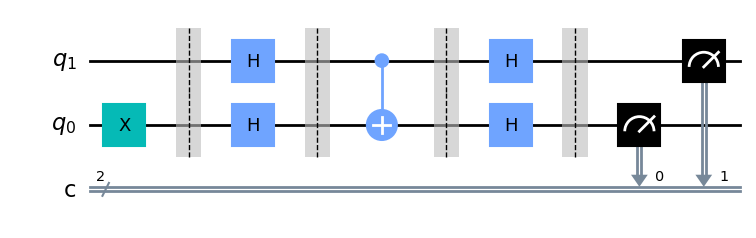

{'11': 100}


In [3]:
"""
So as the theory suggests, when we apply a Controlled-NOT operator, but the 
controller qubit will be affected. This quantum effect is called as the 
Quantum Phase Kickback
"""

#Importing dependencies
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, Aer, execute

#Creating qubits and the circuit
q = QuantumRegister(2,"q")
c = ClassicalRegister(2, "c")
qc = QuantumCircuit(q,c)

#Changing the qubit values
qc.x(q[0])

qc.barrier()
#Applying the Hadamard Gates
qc.h(q[0])
qc.h(q[1])

qc.barrier()
#Applying the CNOT operator
qc.cx(q[1],q[0])

qc.barrier()
#Again applying the Hadamard Operator
qc.h(q[0])
qc.h(q[1])

qc.barrier()

#Measuring
qc.measure(q,c)

#Displaying the circuit
display(qc.draw(output='mpl', reverse_bits= True))

#Running the circuit
job = execute(qc, Aer.get_backend('qasm_simulator'), shots = 100)
counts = job.result().get_counts(qc)

print(counts)


In [ ]:
#Some basic understanding of the phase kickback

"""
So at first we had the two qubits
-after rearrangement the upbit which is q1 is in '0' state
-and the down qubit q0 is in the state '1'
-Now we apply the Hadamard gates to both the qubits and it changes to composite states
-As we apply the CNOT, it affects the values of the |1> qubit
-So the CNOT flips the state of the down qubit
-Before the CNOT operator, the sign of |1> in the up qubit is positive
-After CNOT operator, its sign changes to negative

-This is called as the PHASE KICKBACK


"""